## 1. Загрузка библиотек и данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error, \
    mean_absolute_error, \
    mean_absolute_percentage_error, \
    r2_score


Файл `base.csv` содержит две синтетические переменные `x_1`, `x_2` (целые от 0 до 100) и целевую переменную `y`

Задача: построить модель, которая по известным значениям `x_*` расчитывает значения `y`

In [7]:
# Загрузка данных
df = pd.read_csv('https://raw.githubusercontent.com/Mikhaylov-yv/cnt_predict_lesson/refs/heads/main/data/base.csv')
df

,x_1,x_2,y
0,42,86,592
1,76,8,596
2,25,84,467
3,66,69,709
4,99,84,985
...,...,...,...
395,91,68,881
396,90,10,700
397,47,90,639
398,19,61,356


In [8]:
# Общая статистика по данным.
df.describe()

,x_1,x_2,y
count,400.000000,400.000000,400.00000
mean,49.072500,49.070000,530.71750
std,28.695572,29.842025,218.20803
min,0.000000,0.000000,53.00000
25%,25.000000,24.000000,360.50000
50%,47.000000,47.000000,529.50000
75%,75.000000,77.000000,692.25000
max,99.000000,99.000000,1024.00000


Text(0.5, 0.98, 'Матрица зависимостей')

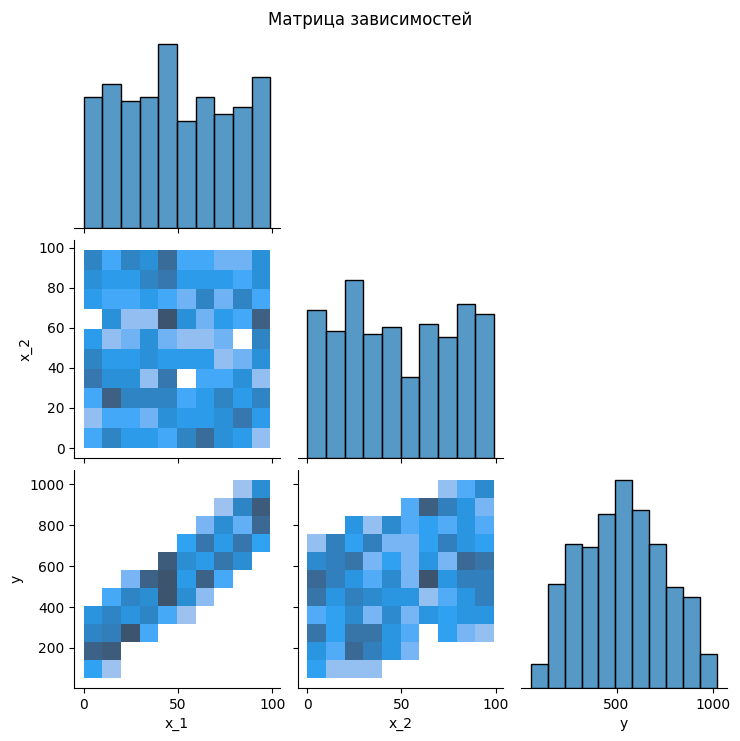

In [9]:
import seaborn as sns

sns.pairplot(df, kind="hist", corner=True)
plt.suptitle('Матрица зависимостей')

Выводы:

* `x_1` и `x_2` не зависят друг от друга.
* `y` явно зависит от `x_1` и `x_2` линейно, но зависимость комплексная.
* зависимость `y` от `x_1` и `x_2` прямая.

## 2. Разделение данных

In [10]:
# Разделение данных на обучающую и тестовую выборки
X = df[['x_1', 'x_2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Линейная регрессия

In [11]:
# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:

# Предсказание на тестовой выборке
y_pred = lr.predict(X_test)

# Оценка модели
print(f'Среднеквадратическая ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'Средняя абсолютная процентная ошибка: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Среднеквадратическая ошибка: 8.128422767397306e-27
Средняя абсолютная ошибка: 5.4356519285647667e-14
Средняя абсолютная процентная ошибка: 1.5681611595827745e-16
R2: 1.0


In [13]:
print(f"""
Коэффициенты модели: {list(lr.coef_)}
Смещение: {lr.intercept_}
""")


Коэффициенты модели: [np.float64(7.000000000000002), np.float64(2.9999999999999982)]
Смещение: 39.99999999999994



Вывод:

Анализируя модель легко понять формулу по которой задача решается аналитически:

$y = 40 + 7x_1 + 3x_2$

## 5. Дерево решений (дополнительно)

In [14]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=3)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [15]:
# Предсказание на тестовой выборке
y_pred = dtr.predict(X_test)

# Оценка модели
print(f'Среднеквадратическая ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'Средняя абсолютная процентная ошибка: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Среднеквадратическая ошибка: 4547.79237245217
Средняя абсолютная ошибка: 53.912937290476826
Средняя абсолютная процентная ошибка: 0.13398901946808695
R2: 0.9083685896697633


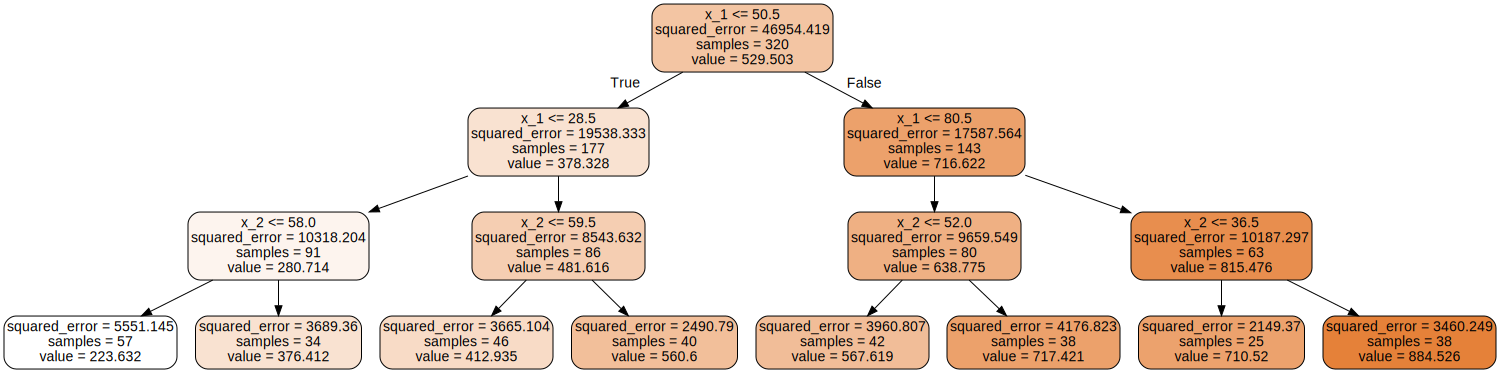

In [16]:
# Экспорт в DOT и визуализация
dot_data = export_graphviz(
    dtr, feature_names=['x_1', 'x_2'],
    filled=True, rounded=True
)
graph = graphviz.Source(dot_data)
graph  # Отобразится в ноутбуке